# Netflix Analysis using TV Shows Dataset from Kaggle

In [1]:
# Import libraries
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import data
file = "netflix_titles.csv"
data = pd.read_csv(file)

# Since column names are rare, we rename columns
rename_data = data.rename(columns={"show_id": "Show ID", "type": "Type", "title": "Title", "director": "Director",
                            "cast": "Cast", "country": "Country", "date_added": "Date Added", "release_year": "Release Year",
                            "rating": "Rating", "duration": "Duration", "listed_in": "Genre", "description": "Description"})

In [4]:
# There is missing some information so we delete these data
clean_data = rename_data.replace(np.NaN)

In [5]:
# We separate the TV Shows data and visualize the information
shows_country = clean_data[clean_data["Type"] == 'TV Show']
shows_country

,Show ID,Type,Title,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Description
2,70234439,TV Show,Transformers Prime,"Richard Finn, Tim Maltby","Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Richard Finn, Tim Maltby","Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,Fernando Lebrija,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,Hannah Fidell,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",United States,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
...,...,...,...,...,...,...,...,...,...,...,...,...
6228,80159925,TV Show,Kikoriki,Onur Ünlü,Igor Dmitriev,Australia,"April 1, 2014",2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,Onur Ünlü,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,"April 1, 2014",2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Onur Ünlü,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,"April 1, 2014",2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Onur Ünlü,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,"April 1, 2014",2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [13]:
# We visualize that the total of all data set is 6234 and after selecting the tv shows, we have 1969
print('Length of Total Dataset: ' + str(len(clean_data)))
print('Length of TV Shows Dataset: ' + str(len(shows_country)))

Length of Total Dataset: 6234
Length of TV Shows Dataset: 1969


In [15]:
# We count the number of shows per genre and save all the genres we have in our dataset
genre_list_show = [] # Shows
genre_count_show = {} # Shows counting

for listed in shows_country['Genre']:
    split_gen = [x.strip() for x in listed.split(',')] # Split in list where there is more than one value
    
    # Counting dictionary
    for i in range(len(split_gen)): 
        # Check if exists in genre_list or not and add it
        if split_gen[i] not in genre_list_show: 
            genre_list_show.append(split_gen[i]) 
        # Count    
        if split_gen[i] in genre_count_show:
            genre_count_show[split_gen[i]] = genre_count_show[split_gen[i]] + 1
        else:
            genre_count_show[split_gen[i]] = 1

<IPython.core.display.Javascript object>


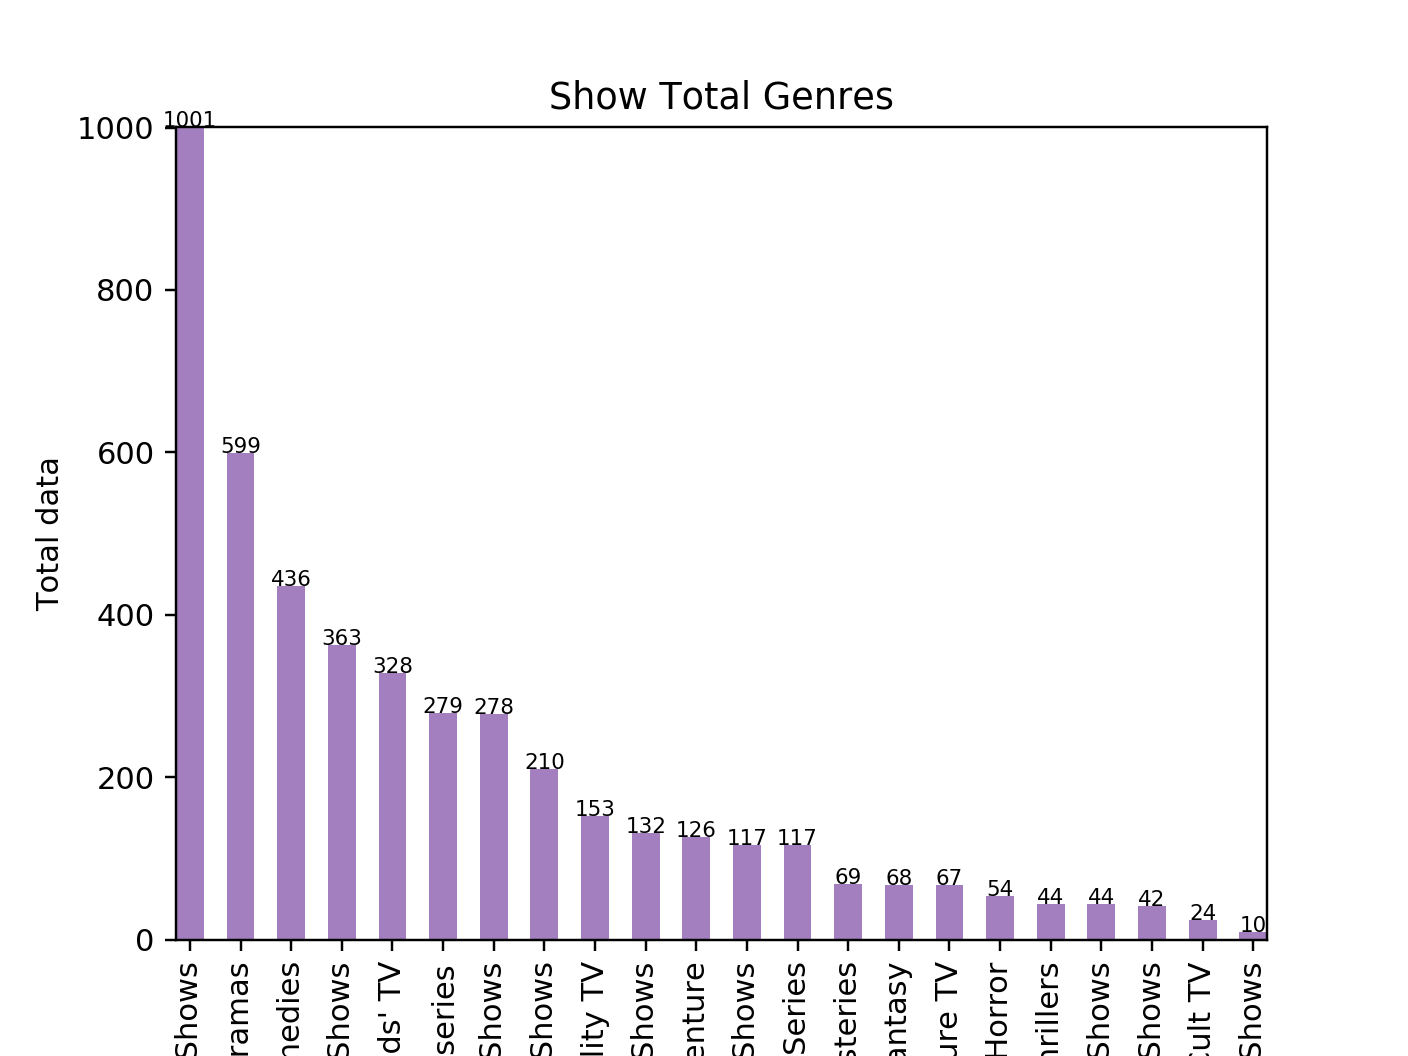

In [23]:
# Ploting the total counts
# Save to dataframe
df_genres_shows = pd.DataFrame.from_dict(genre_count_show, orient='index', columns=['Total Data'])
# Sort values
sorted_genres_show = df_genres_shows.sort_values(by=['Total Data'], ascending=False)
sorted_genres_show.head(10)
# Bar plot
x_genres_shows = np.arange(len(sorted_genres_show['Total Data']))
tick_gslocations = [value for value in x_genres_shows]
width = 0.55
#plt.figure(figsize=(20,10))
plt.bar(x_genres_shows, sorted_genres_show['Total Data'], width=width, color='indigo', alpha=0.5) 
plt.xticks(tick_gslocations, sorted_genres_show.index, rotation="vertical")
plt.autoscale(tight=True)
plt.xlabel("Genres")
plt.ylabel("Total data")
plt.title("Show Total Genres")

for i, v in enumerate(sorted_genres_show['Total Data']):
    plt.text(i, v, str(v), color='k', ha='center', fontsize=7)
    
plt.savefig("TotalGenresShow.png")

In [25]:
# Now we count the shows per country and extract the countries that have shows in Netflix library
country_list_show = [] # Save countries
country_count_show = {} # Count shows per country

for listed_in in shows_country['Country']:
    split_country = [x.strip() for x in listed_in.split(',')] # Split in list if there are more than one collaboration
  
    # To save the data
    for j in range(len(split_country)): 
        # Check if exists in country_list or not and add it
        if split_country[j] not in country_list_show: 
            country_list_show.append(split_country[j]) 
        # Count genres per country
        if split_country[j] in country_count_show:
            country_count_show[split_country[j]] = country_count_show[split_country[j]] + 1
        else:
            country_count_show[split_country[j]] = 1

In [26]:
# We go deeper into the information to analyze the number of shows separated by genre existing per country
# We create a matrix where columns are genre list and rows are the countries
matrizSh = np.zeros((len(country_list_show),len(genre_list_show)))
# Save values of countries and genres
ctempo = shows_country['Country'].values
gtempo = shows_country['Genre'].values

for i in range(len(ctempo)): # We are in a row
    #print(i)
    cstmp=ctempo[i].split(',') # Separate the data if there is more than one country
    #print(cstmp)
    for k in range(len(cstmp)): # Analyzing each country of the previous split, we are still in the same row
        gctmp=gtempo[i].split(',') # We jump to the next cell where there are the genres and separate them
        #print(gctmp)
        for j in range(len(gctmp)): # Here, we are going to move through each genre for one country 
            # We use the matrix as a xy coordinate system where x would be the index of countries, and y would be the columns of genre.
            # To get the index of each value, we use the list information of countries and genres and the function .index to look for the respective country and genre
            # We sum +1 when we get the xy coordinates
            try: 
                matrizSh[country_list_show.index(cstmp[k].strip()),genre_list_show.index(gctmp[j].strip())]=matrizSh[country_list_show.index(cstmp[k].strip()),genre_list_show.index(gctmp[j].strip())]+1
            except:
                print('Error') # Just to verify that we gather all the data
                
                
                
# VERIFICAR LA INFO DE XY, CREO QUE ESTAN AL REVES

In [27]:
# We convert the matrix information to a dataframe
df_shows = pd.DataFrame(data=matrizSh, index=country_list_show, columns=genre_list_show)
df_shows

,Kids' TV,Crime TV Shows,International TV Shows,Spanish-Language TV Shows,Docuseries,Science & Nature TV,Romantic TV Shows,TV Comedies,TV Dramas,TV Thrillers,...,Reality TV,TV Action & Adventure,Teen TV Shows,Korean TV Shows,Anime Series,TV Horror,Stand-Up Comedy & Talk Shows,TV Sci-Fi & Fantasy,TV Shows,Classic & Cult TV
United States,183.0,129.0,134.0,30.0,149.0,34.0,54.0,224.0,234.0,23.0,...,76.0,73.0,20.0,13.0,14.0,33.0,30.0,52.0,4.0,16.0
Spain,5.0,21.0,47.0,31.0,6.0,1.0,11.0,8.0,13.0,0.0,...,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Belgium,1.0,6.0,9.0,0.0,0.0,0.0,1.0,1.0,8.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
France,36.0,20.0,43.0,0.0,6.0,1.0,7.0,21.0,26.0,3.0,...,4.0,5.0,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Malta,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Croatia,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hungary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cyprus,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# We analyze the top 10 countries with more TV Shows
# To gather this information we sort the values
country_df_show = pd.DataFrame.from_dict(country_count_show, orient='index', columns=['Total Data'])
sorted_countries_show = country_df_show.sort_values(by=['Total Data'], ascending=False)
sorted_countries_show.head(10)

,Total Data
United States,810
United Kingdom,250
Japan,162
South Korea,129
Canada,126
India,89
France,83
Taiwan,68
Australia,60
Spain,57


<IPython.core.display.Javascript object>


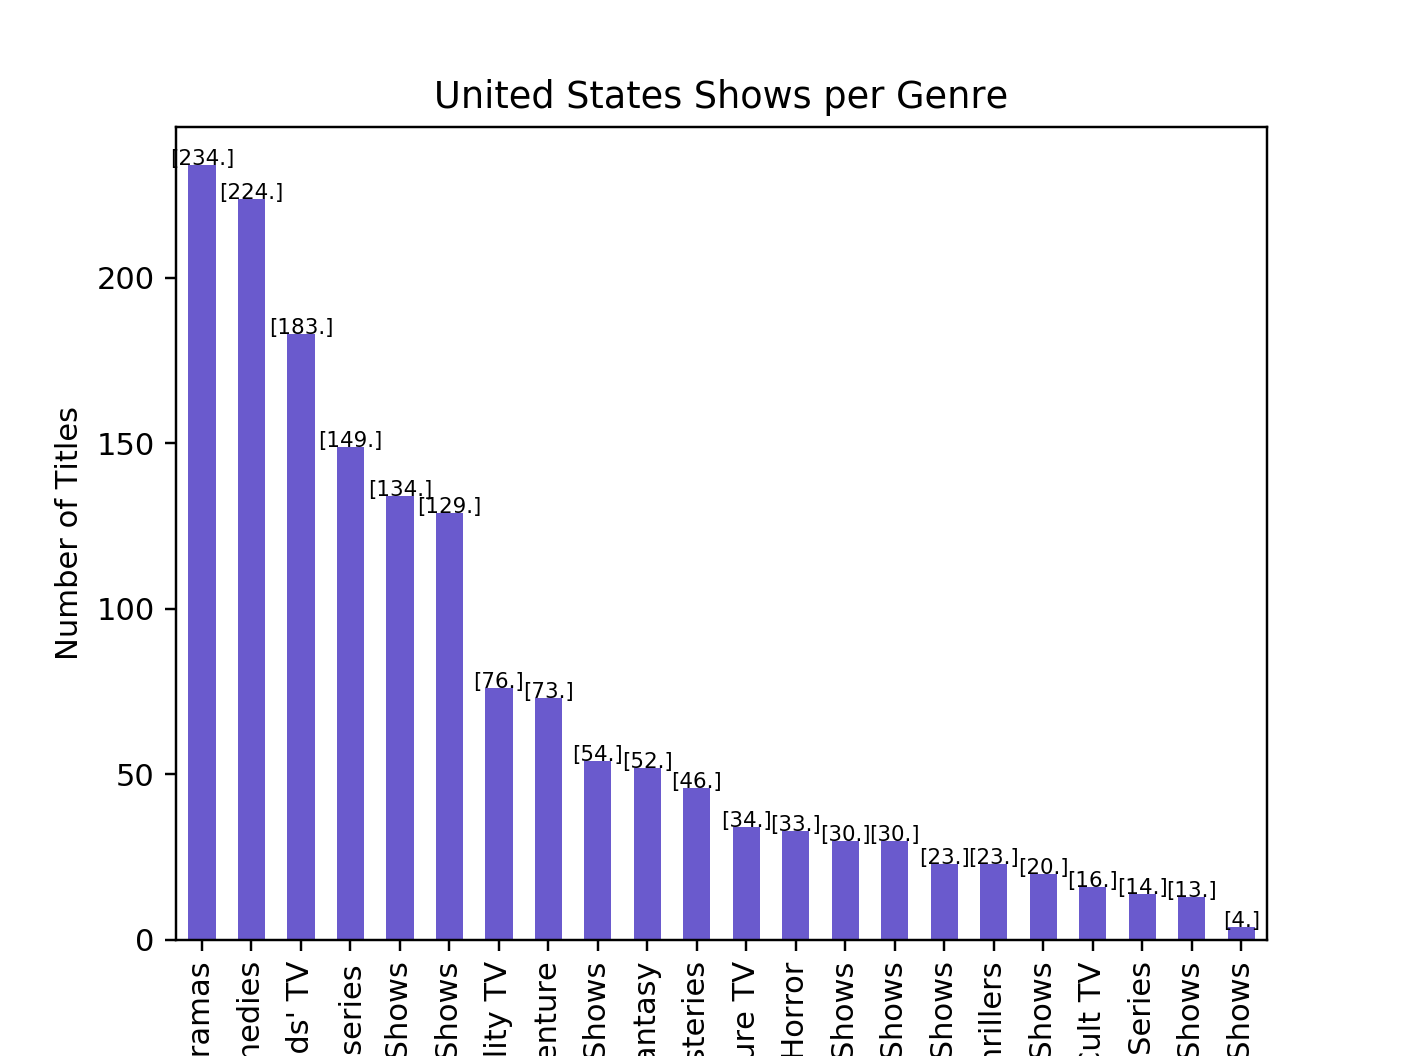

<IPython.core.display.Javascript object>


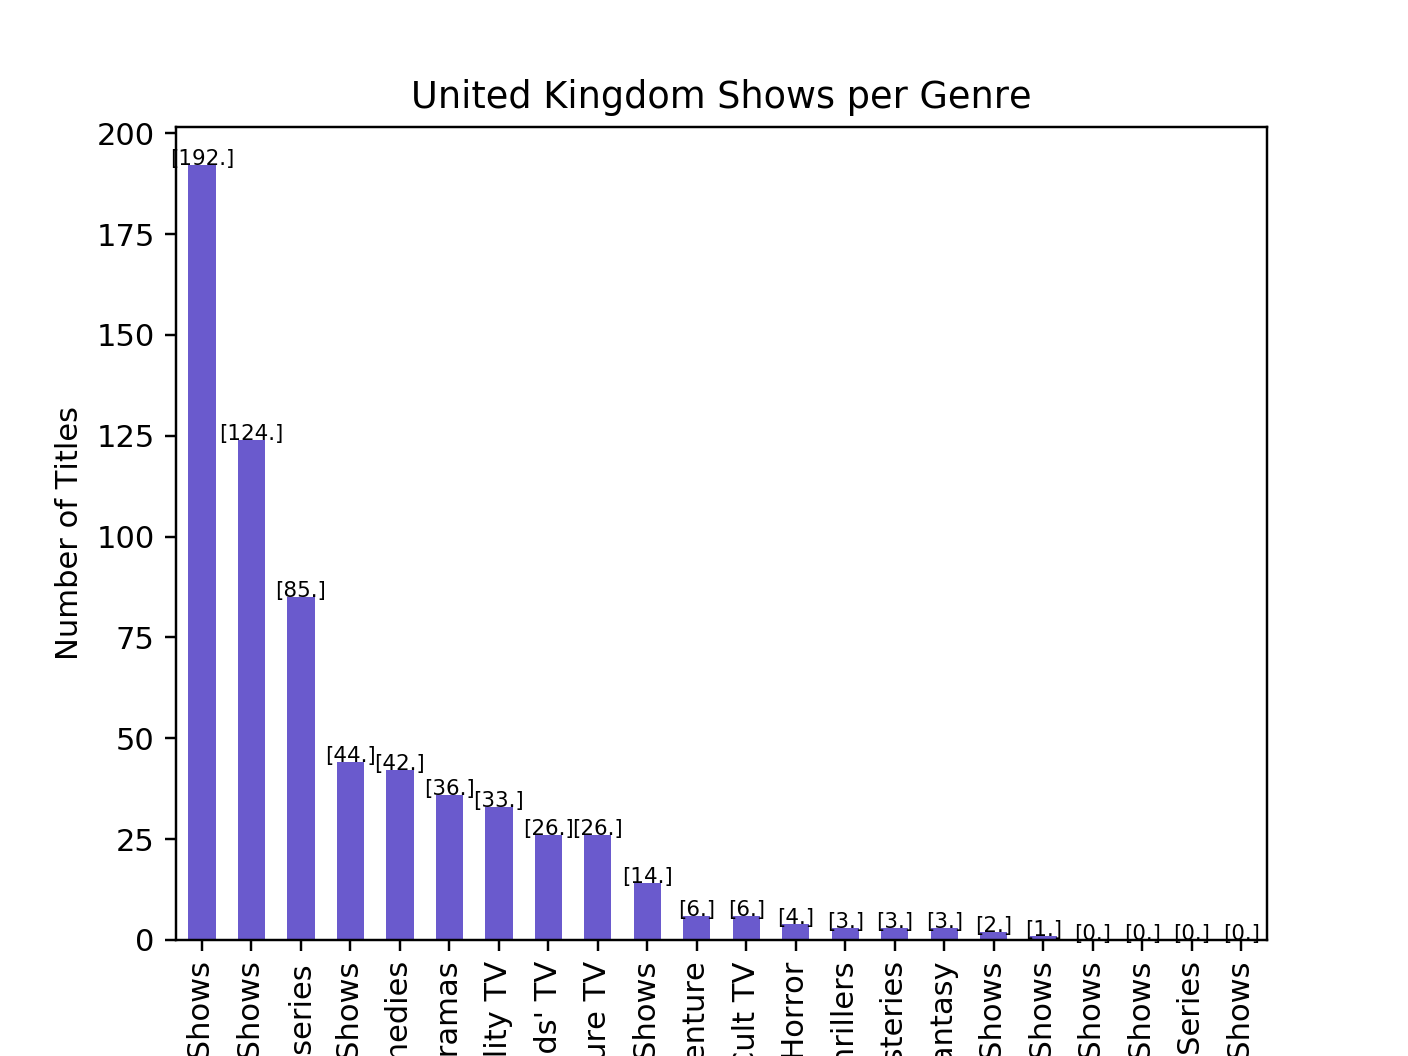

<IPython.core.display.Javascript object>


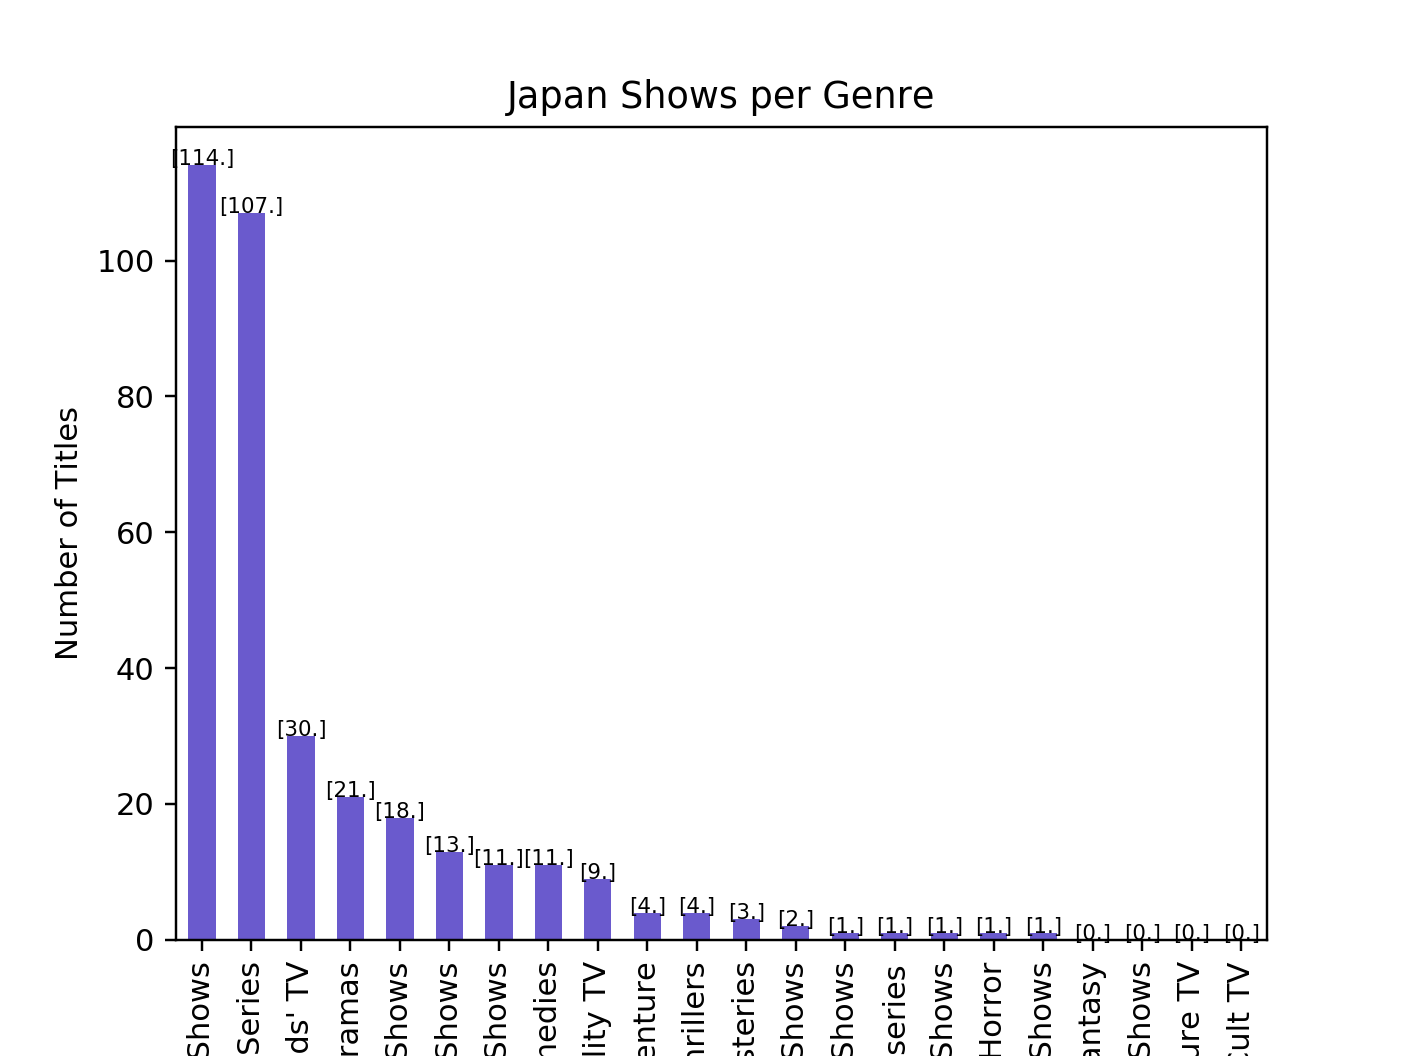

<IPython.core.display.Javascript object>


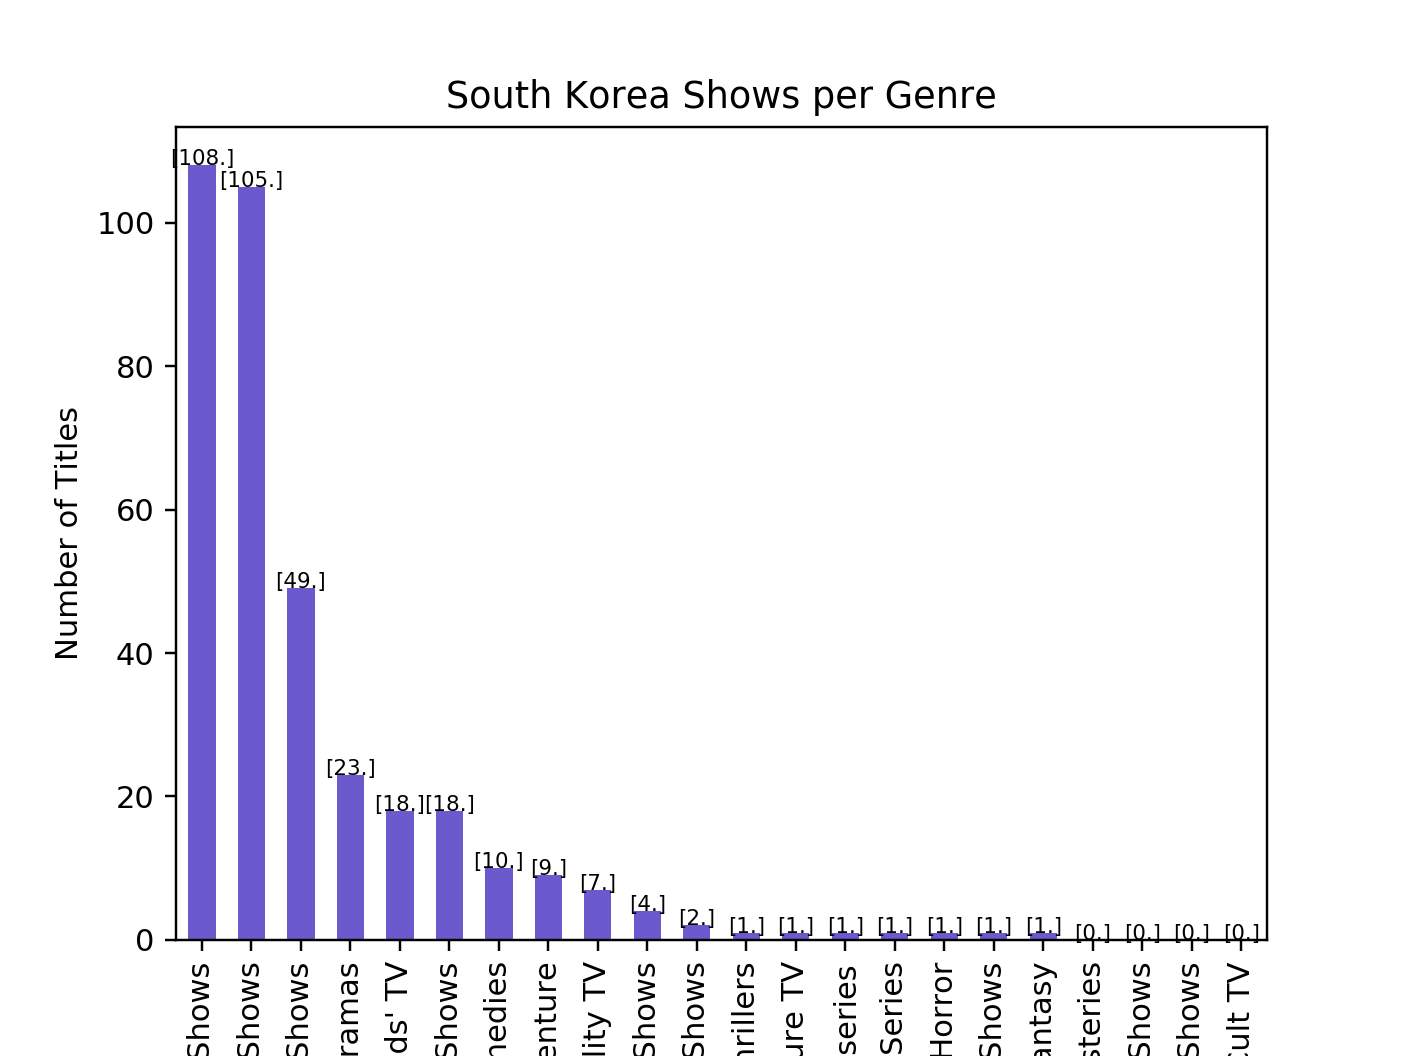

<IPython.core.display.Javascript object>


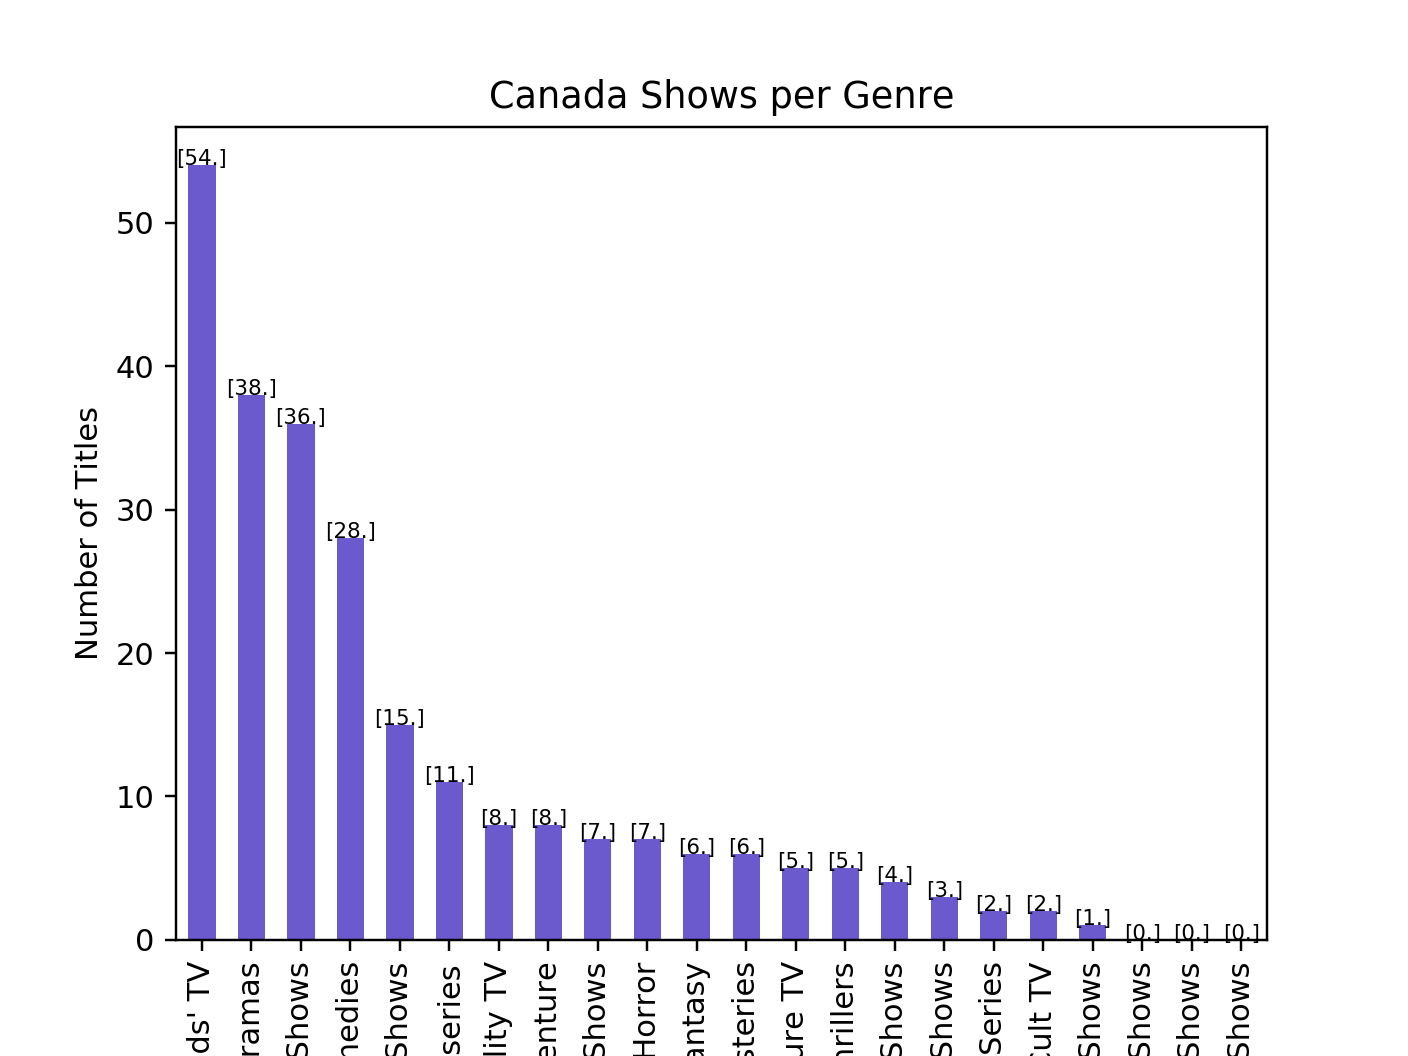

<IPython.core.display.Javascript object>


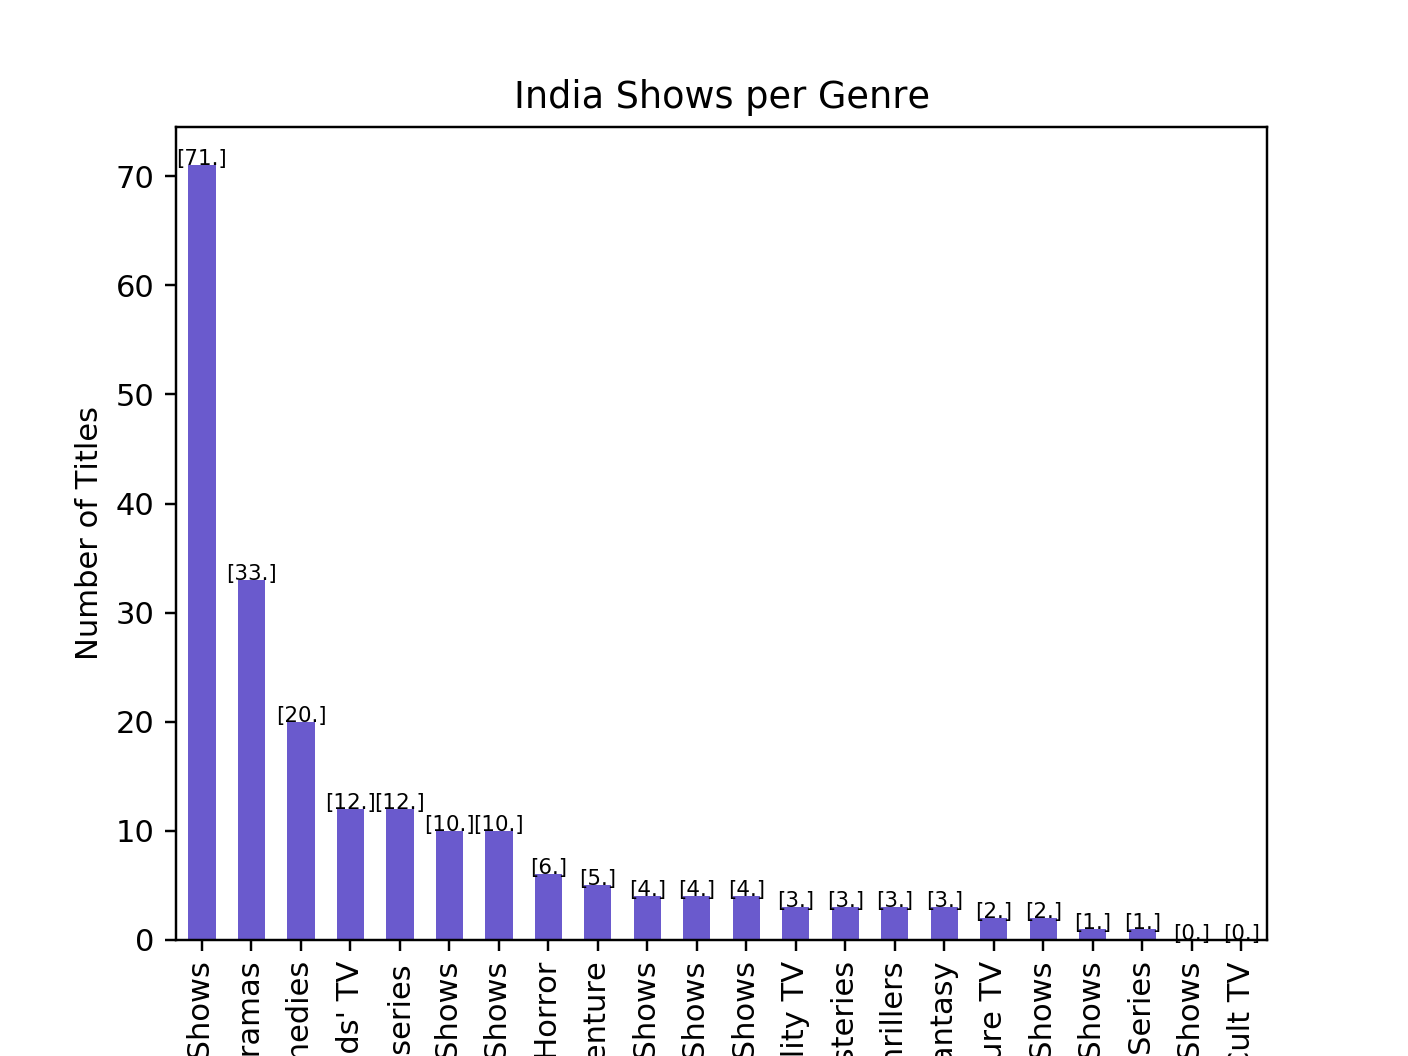

<IPython.core.display.Javascript object>


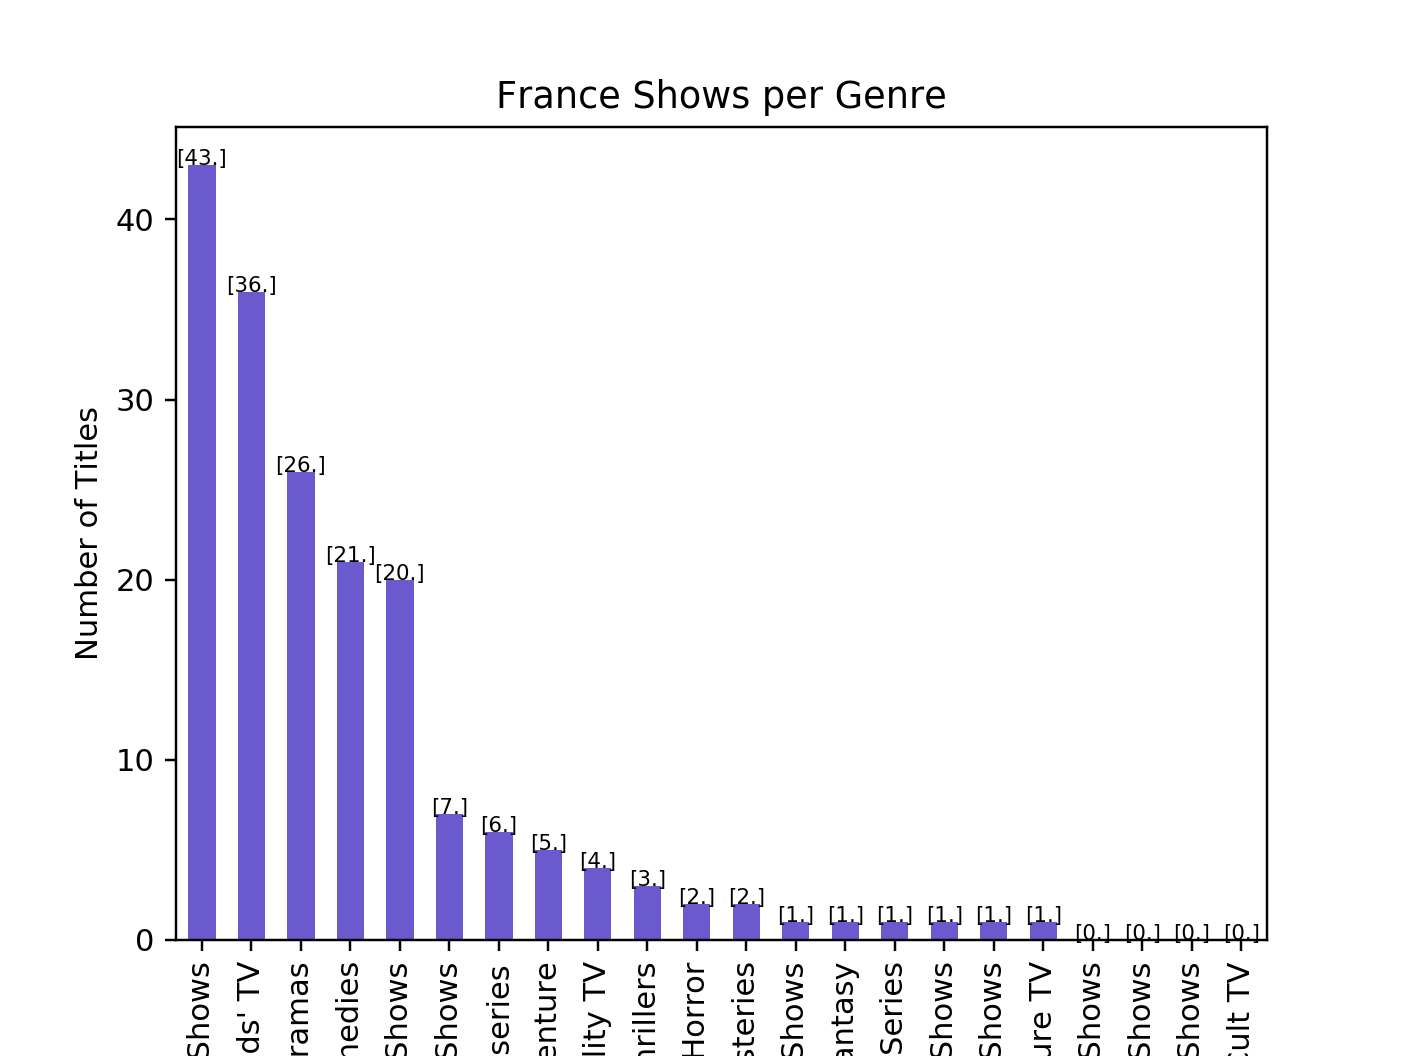

<IPython.core.display.Javascript object>


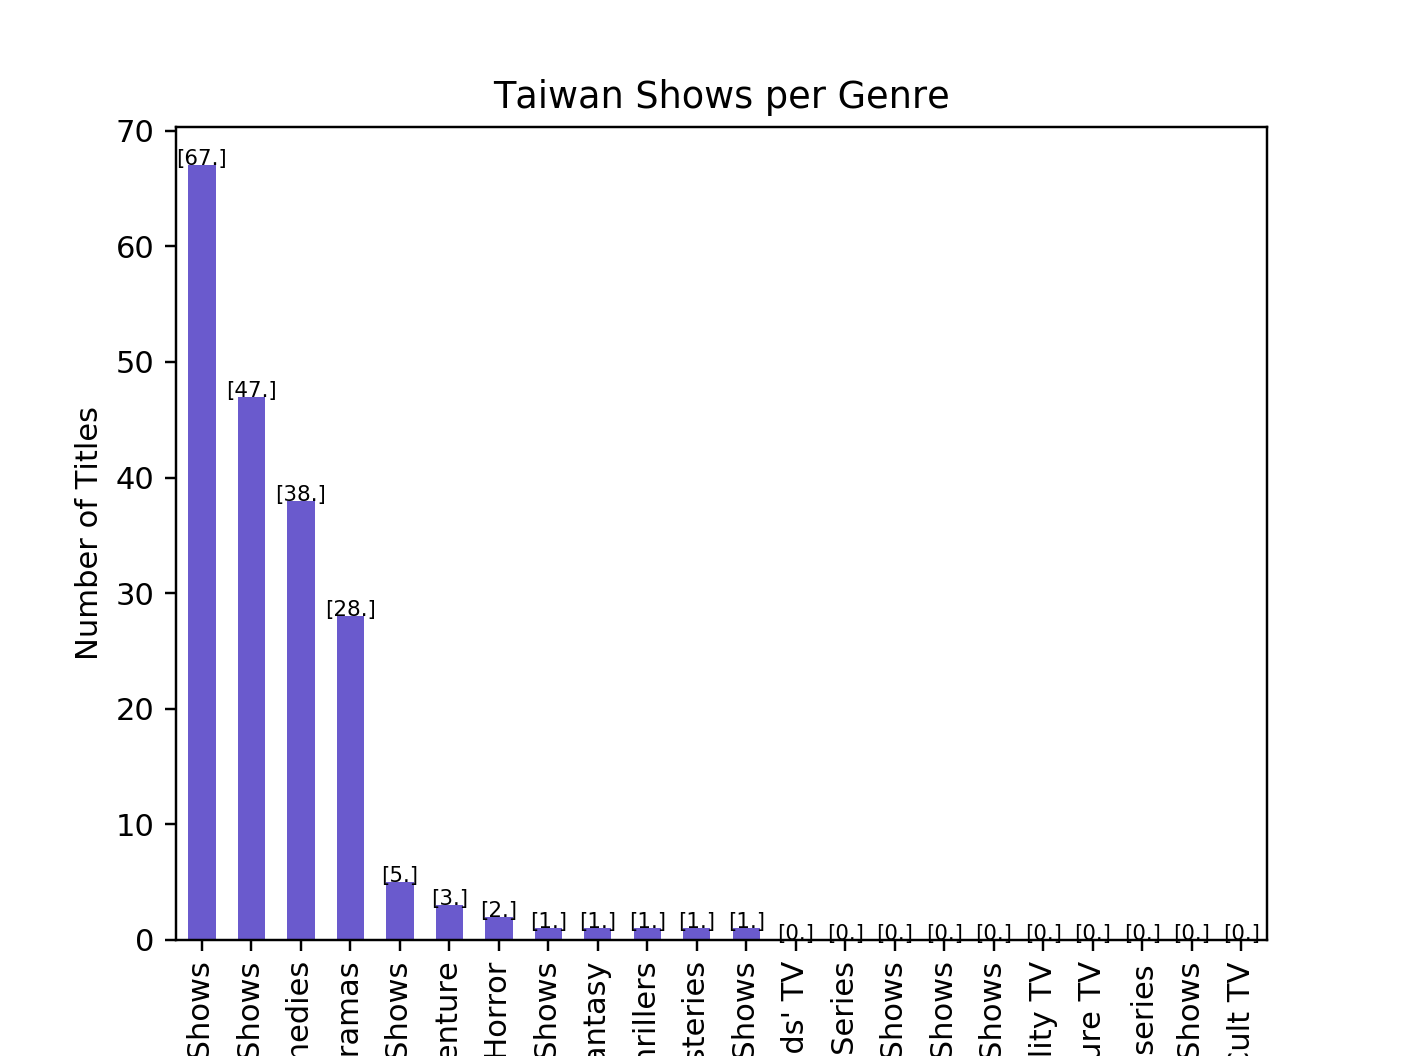

<IPython.core.display.Javascript object>


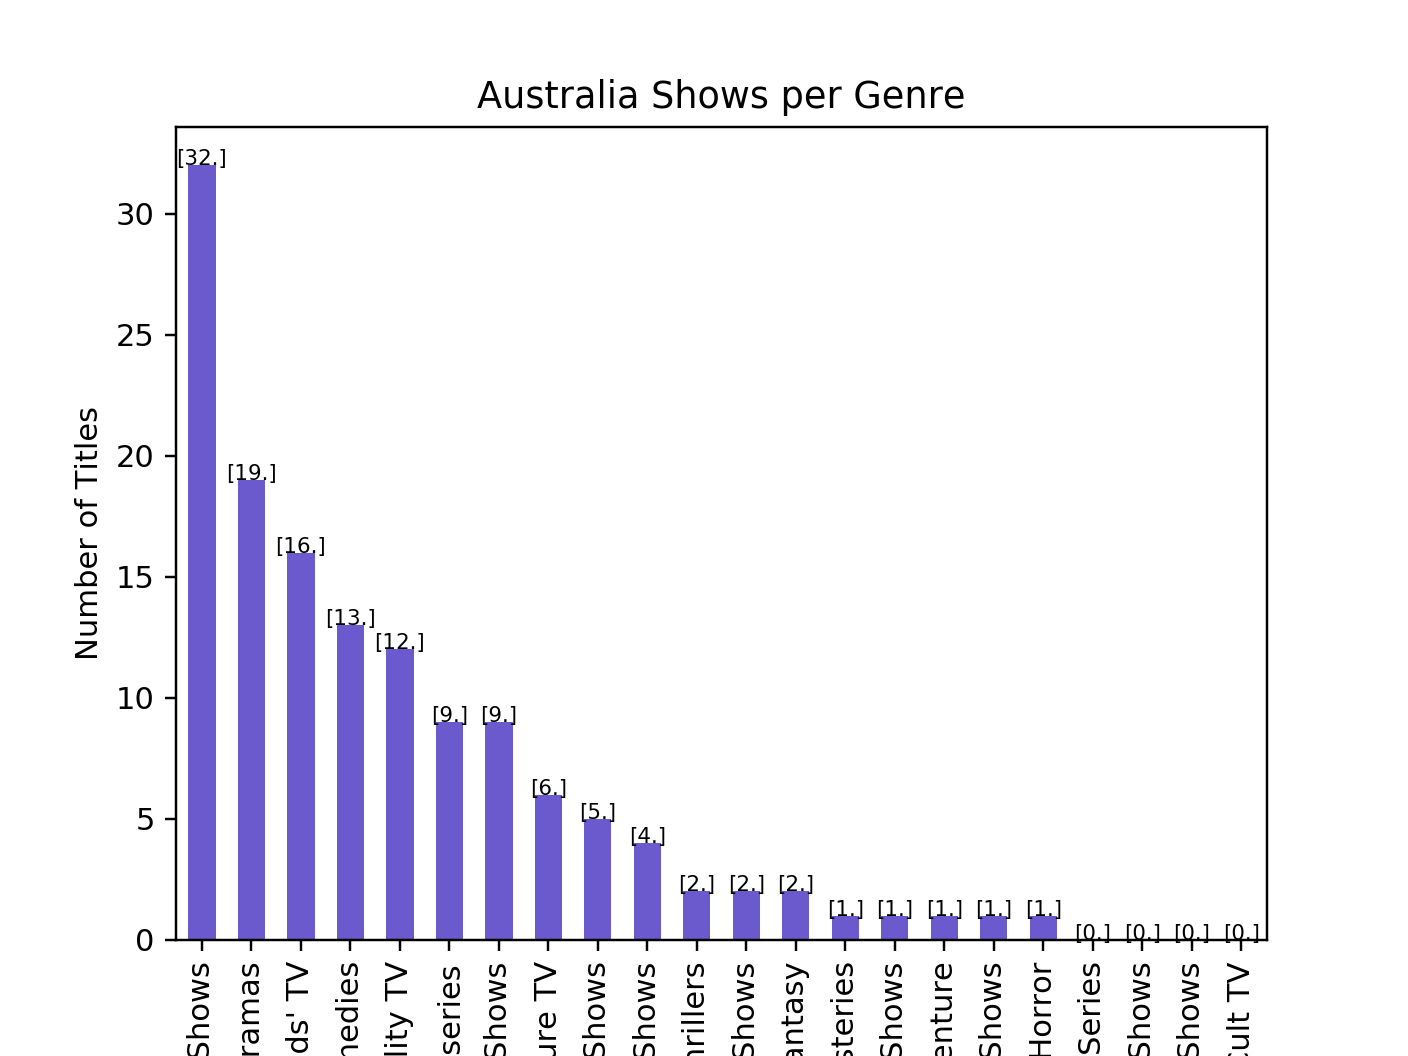

<IPython.core.display.Javascript object>


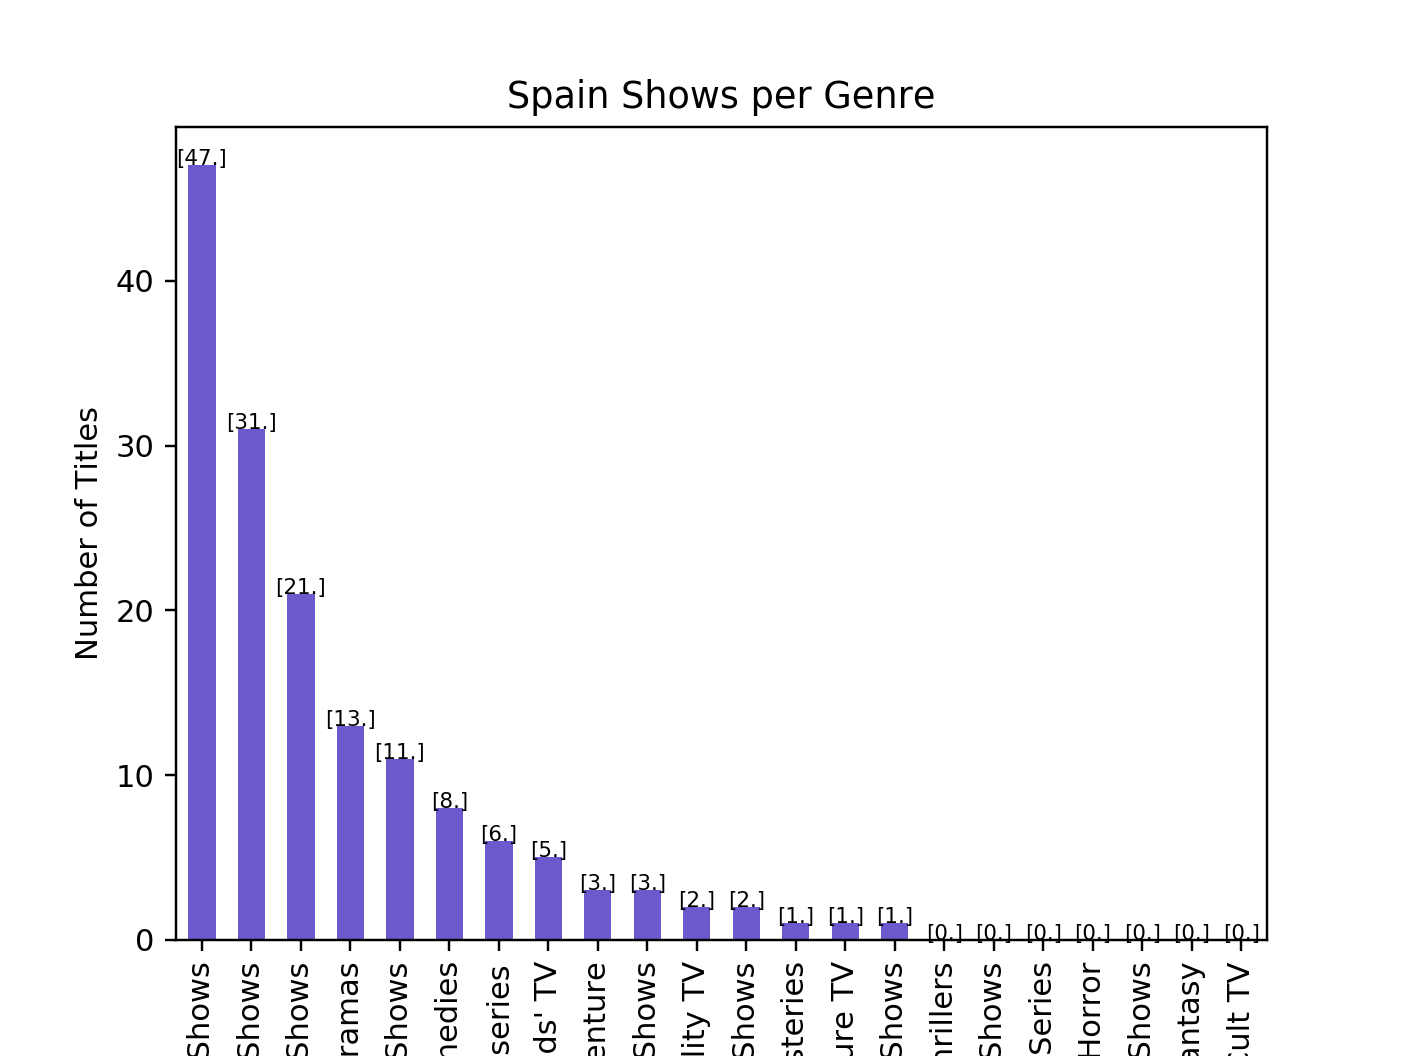

In [32]:
# We plot the top 10 countries with their respective counting shows by genre
for a in range(10):
    select_country = sorted_countries_show.index[a] # Country
    country_genres = df_shows.loc[df_shows.index == select_country,:] # Data from that country
    # Dataframe to sort the values
    df_sorted_genre = pd.DataFrame(country_genres).sort_values(by=select_country, axis=1, ascending=False)
    # We transpose the row data to column data to make easier the ploting 
    df_sorted_genre_T = df_sorted_genre.T
    
    # Bar Plot
    width = 0.55
    ax_bar = df_sorted_genre_T.plot(kind='bar', facecolor='slateblue', width=width, legend=None)
    plt.title(select_country+' Shows per Genre')
    plt.ylabel('Number of Titles')
    plt.xlabel('Genres')
    
    # To enumarate the values in bars
    for i, v in enumerate(df_sorted_genre_T.values):
        ax_bar.text(i, v, str(v), color='k', ha='center', fontsize=7)
        
    # Save figures
    plt.savefig('TVShow_Country' + str(a) + '.png')

In [33]:
# Export dataframes of TV Shows data set and TV Shows per genre per country
shows_country.to_csv("Netflix_TVShows_Data.csv", index=True, header=True)
df_shows.to_csv('Netflix_TVShows_perCountry.csv', index=True, header=True)
